In [11]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
#imported a library that I created so that I wouldn't clutter this notebook
from mylib.mean_variance import *
import statsmodels.api as sm
from datlib.FRED import *
from datlib.plots import *
benchmark = "^GSPC"
plt.rcParams.update({"font.size":40})
start = datetime.datetime(2011,1,1)
end = datetime.datetime.today()
rf = web.DataReader("^TNX", "yahoo", start = datetime.datetime(2021,10,1), end = end)["Adj Close"]
rf = pd.DataFrame(rf)
ticker_lst = ["AAPL", "MSFT", "NVDA", "AVGO", 
              "AMZN", "HD", "NKE", 
              "JPM", "ICE", "BX", 
              "ABT", "DHR", 
              "GOOGL", 
              "DE", "MMM", 
              "COST", "EL", 
              "AMT", 
              "BND", "SUB"]

In [12]:
portfolios = mean_variance(ticker_lst, 
                           num_ports = 50000, 
                           start = start, 
                           end = end, 
                           benchmark = benchmark,
                           rf = rf["Adj Close"][-1])
portfolios

,Returns,Volatility,Sharpe Ratio,Portfolio Beta,Jensen's Alpha,Information Ratio,AAPL Weight,MSFT Weight,NVDA Weight,AVGO Weight,...,ABT Weight,DHR Weight,GOOGL Weight,DE Weight,MMM Weight,COST Weight,EL Weight,AMT Weight,BND Weight,SUB Weight
0,26.004142,15.783019,1.556429,0.880308,13.119797,0.247741,0.043486,0.021318,0.067745,0.040076,...,0.078680,0.051741,0.045329,0.050936,0.074101,0.070625,0.019505,0.037286,0.077767,0.057167
1,26.370635,17.117905,1.456465,0.962653,12.415679,0.328108,0.064293,0.090992,0.005881,0.057794,...,0.051408,0.046266,0.052742,0.024101,0.031253,0.050370,0.074270,0.056428,0.031988,0.016525
2,30.924430,18.599585,1.585274,1.039320,15.972697,0.378003,0.063572,0.082877,0.062287,0.054134,...,0.005907,0.051891,0.047674,0.023151,0.022993,0.068277,0.036517,0.035776,0.016223,0.007022
3,25.994959,16.027078,1.532154,0.883172,13.073380,0.278225,0.061749,0.012901,0.029737,0.024593,...,0.016912,0.086613,0.114466,0.058653,0.011658,0.108515,0.078677,0.017369,0.050882,0.070862
4,27.165827,17.588899,1.462674,0.983375,12.941461,0.278066,0.022534,0.022327,0.076868,0.002232,...,0.085664,0.095608,0.028947,0.078496,0.094748,0.039794,0.030349,0.045605,0.007986,0.030530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,29.362780,17.538115,1.592177,0.956887,15.482793,0.322636,0.123900,0.058639,0.074493,0.085967,...,0.041105,0.088557,0.078641,0.005206,0.029269,0.038241,0.012590,0.073201,0.057655,0.060242
49996,28.097914,17.457502,1.527075,0.973171,14.006208,0.303544,0.009272,0.094331,0.077787,0.075861,...,0.053365,0.057466,0.070437,0.032905,0.052120,0.025746,0.059334,0.064987,0.010339,0.064616
49997,25.902892,16.887428,1.448645,0.946719,12.155112,0.288054,0.013740,0.047451,0.030657,0.096504,...,0.069490,0.081646,0.031399,0.014568,0.042170,0.015606,0.000824,0.109375,0.056109,0.037964
49998,25.252824,16.739366,1.422624,0.938660,11.609819,0.254911,0.094945,0.011166,0.021126,0.057876,...,0.034741,0.001631,0.018624,0.094927,0.067010,0.083096,0.076271,0.028293,0.029590,0.067078


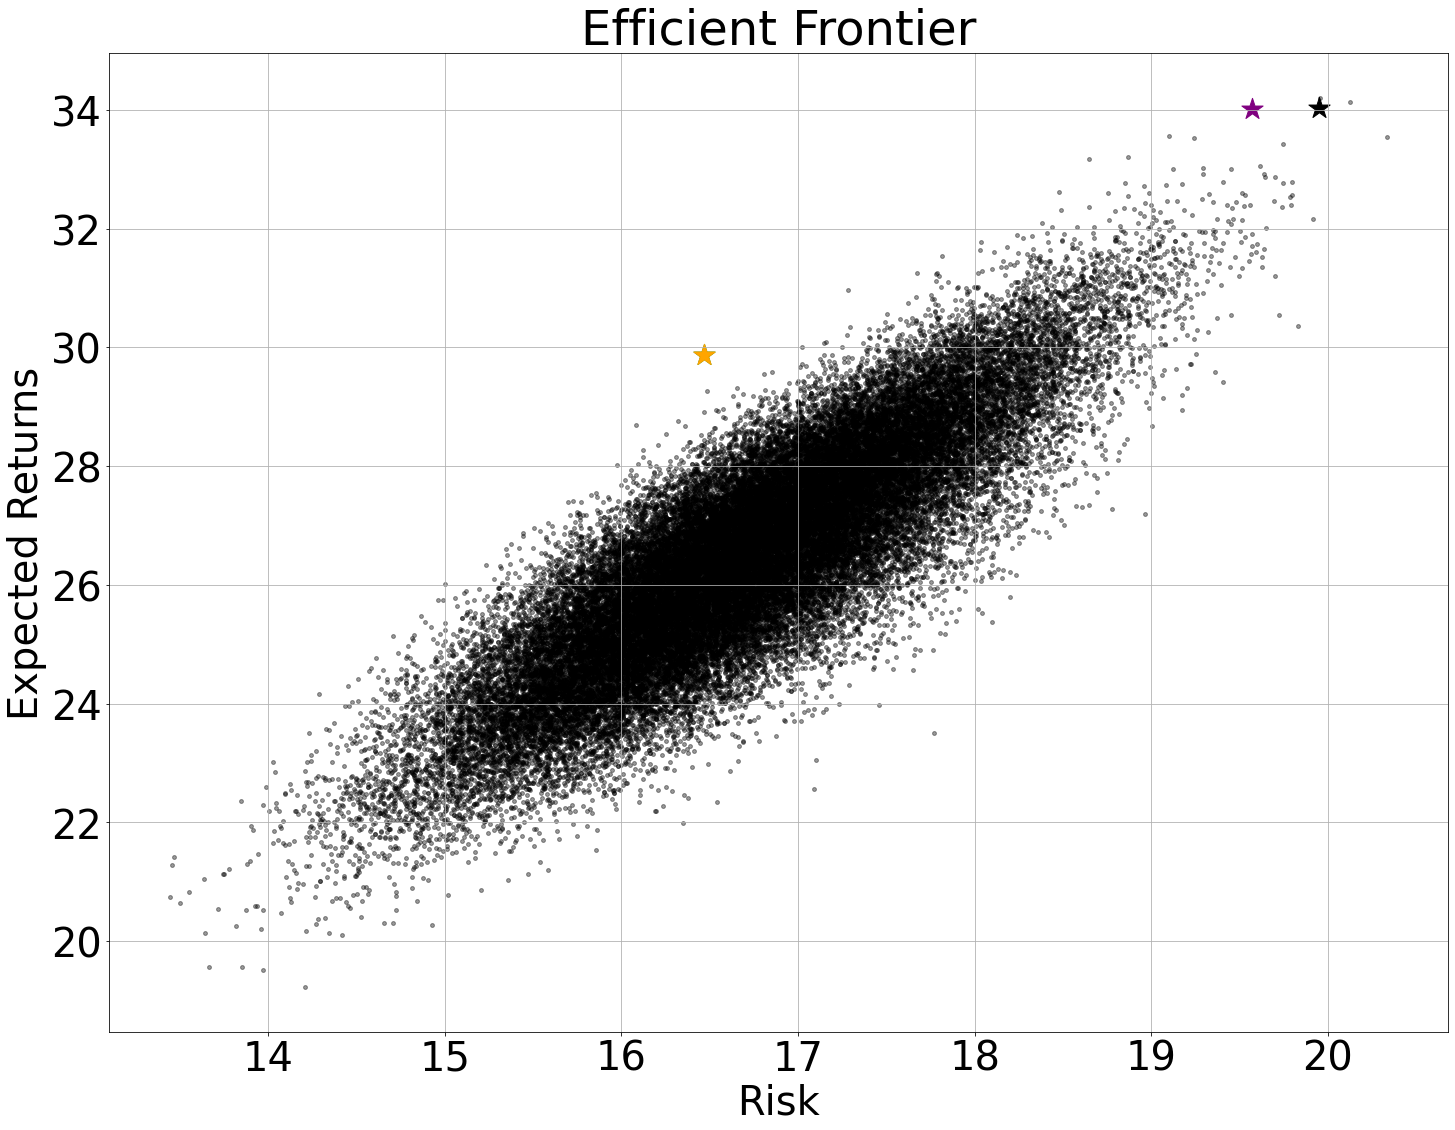

In [13]:
efficient_frontier(portfolios, 
                   benchmark = benchmark, 
                   alpha = .4, 
                   rf = rf["Adj Close"][-1], 
                   start = start, 
                   end = end, 
                   figsize = (24,18))

In [14]:
sharpe_portfolio = optimal_sharpe_portfolio(
    portfolios, 
    rf = rf["Adj Close"][-1])
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,Portfolio Beta,Jensen's Alpha,Information Ratio,AAPL Weight,MSFT Weight,NVDA Weight,AVGO Weight,...,ABT Weight,DHR Weight,GOOGL Weight,DE Weight,MMM Weight,COST Weight,EL Weight,AMT Weight,BND Weight,SUB Weight
17238,29.878324,16.468495,1.726893,0.883152,16.957003,0.304759,0.07454,0.035438,0.132305,0.034547,...,0.015383,0.13037,0.039863,0.021035,0.014741,0.127165,0.003031,0.007047,0.112663,0.049902


In [15]:
jensens_portfolio = optimal_jensens_alpha(portfolios)
jensens_portfolio

,Returns,Volatility,Sharpe Ratio,Portfolio Beta,Jensen's Alpha,Information Ratio,AAPL Weight,MSFT Weight,NVDA Weight,AVGO Weight,...,ABT Weight,DHR Weight,GOOGL Weight,DE Weight,MMM Weight,COST Weight,EL Weight,AMT Weight,BND Weight,SUB Weight
13238,34.009931,19.567459,1.664546,1.051488,18.899984,0.396821,0.050377,0.04286,0.123427,0.065511,...,0.009831,0.120869,0.123052,0.008472,0.007749,0.010477,0.003677,0.040345,0.025065,0.017713


In [ ]:
def effects_on_returns(portfolios, figsize, color, alpha, s):
    # determine the dimensions 
    # count the dimensions sqrt and round up
    # cycle through the keys i+1 
    
    for key in portfolios: 
        x = portfolios[key]
        y = portfolios["Returns"]
        m, b = np.polyfit(x, y, 1)
        portfolios.plot.scatter(x = key,
                                y ="Returns",
                                marker = "o",
                                color = color,
                                s = s,
                                alpha = alpha,
                                grid = True,
                                figsize = figsize)
        plt.plot(x, 
                 m*x + b, 
                 linewidth = 5)
        plt.title(key+" Effect on Portfolio Returns")
        print(key+": ", m)
        plt.show()
        plt.close();